In [48]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!ls pyWake/

pywake_FUGA.nc        pywake_linear_bast.nc


In [3]:
!ls foxes/

power_validation_inputs_foxes_A.csv
power_validation_inputs_foxes_B.csv
power_validation_inputs_foxes_C.csv
power_validation_inputs_foxes_D.csv
power_validation_inputs_foxes_E.csv
power_validation_inputs_foxes_F.csv
power_validation_inputs_foxes_G.csv
turbine_data_validation_inputs_foxes_A.nc
turbine_data_validation_inputs_foxes_B.nc
turbine_data_validation_inputs_foxes_C.nc
turbine_data_validation_inputs_foxes_D.nc
turbine_data_validation_inputs_foxes_E.nc
turbine_data_validation_inputs_foxes_F.nc
turbine_data_validation_inputs_foxes_G.nc


In [4]:
!ls WAYVE/

power_windio_les_validation_wayve.csv


In [6]:
pywake_no_blockage = xr.load_dataset('pyWake/pywake_linear_bast.nc')
pywake_blockage = xr.load_dataset('pyWake/pywake_FUGA.nc')

In [10]:
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
foxes_pred = [xr.load_dataset('foxes/turbine_data_validation_inputs_foxes_%s.nc' % letters[ii]) for ii in range(len(letters))]

In [31]:
wayve_dat = pd.read_csv('WAYVE/power_windio_les_validation_wayve.csv')

In [62]:
np.array([wayve_dat.iloc[0].values[1:].max(), 1e3 * foxes_pred[0].isel(state=0).P.values.max(),  pywake_no_blockage.isel(time=0).Power.values.max()]) / 1e6

array([ 9.19739901, 10.60773503,  9.56215049])

In [74]:
case_num = 3

ok


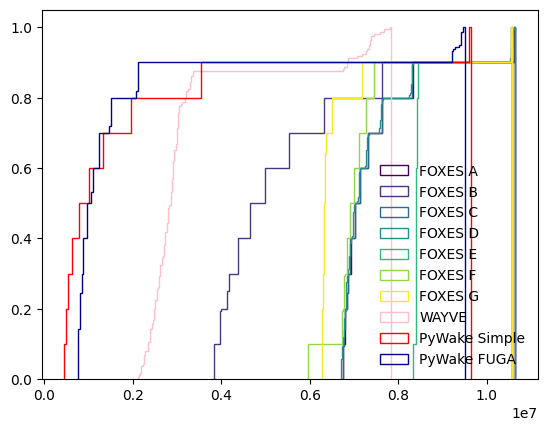

In [78]:
foxes_colors = plt.cm.viridis(np.linspace(0, 1, len(letters)))
pywake_colors = ['red', 'darkblue']

for ll in range(len(letters)):
    plt.hist(foxes_pred[ll].isel(state=case_num).P * 1e3, 200, density=True, cumulative=True, histtype='step', edgecolor=foxes_colors[ll], label='FOXES %s' % letters[ll])
plt.hist(wayve_dat.iloc[case_num].values[1:], 200, cumulative=True, density=True, histtype='step', edgecolor='pink', label='WAYVE')
plt.hist(pywake_no_blockage.isel(time=case_num).Power, 200, density=True, cumulative=True, histtype='step', edgecolor=pywake_colors[0], label='PyWake Simple')
plt.hist(pywake_blockage.isel(time=case_num).Power, 200, density=True, cumulative=True, histtype='step', edgecolor=pywake_colors[1], label='PyWake FUGA')
plt.legend()
print('ok')

ok


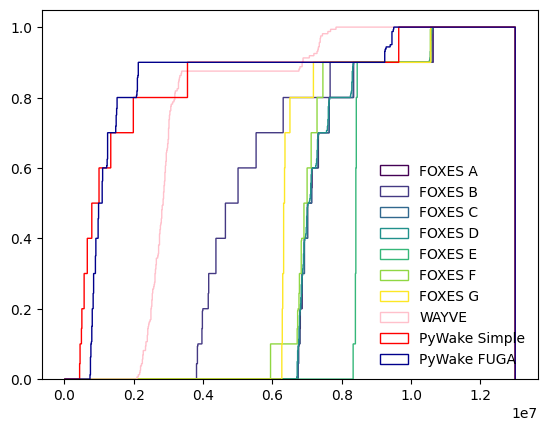

In [79]:
bins = np.linspace(0, 1.3e7, 1000)

foxes_colors = plt.cm.viridis(np.linspace(0, 1, len(letters)))
pywake_colors = ['red', 'darkblue']

for ll in range(len(letters)):
    plt.hist(foxes_pred[ll].isel(state=case_num).P * 1e3, bins, density=True, cumulative=True, histtype='step', edgecolor=foxes_colors[ll], label='FOXES %s' % letters[ll])
plt.hist(wayve_dat.iloc[case_num].values[1:], bins, cumulative=True, density=True, histtype='step', edgecolor='pink', label='WAYVE')
plt.hist(pywake_no_blockage.isel(time=case_num).Power, bins, density=True, cumulative=True, histtype='step', edgecolor=pywake_colors[0], label='PyWake Simple')
plt.hist(pywake_blockage.isel(time=case_num).Power, bins, density=True, cumulative=True, histtype='step', edgecolor=pywake_colors[1], label='PyWake FUGA')
plt.legend()
print('ok')

In [81]:
!ls LES

H1000-C2-G1.txt H1000-C8-G1.txt H300-C5-G1.txt  H500-C2-G1.txt  H500-C8-G1.txt
H1000-C2-G4.txt H1000-C8-G4.txt H300-C5-G4.txt  H500-C2-G4.txt  H500-C8-G4.txt
H1000-C2-G8.txt H1000-C8-G8.txt H300-C5-G8.txt  H500-C2-G8.txt  H500-C8-G8.txt
H1000-C5-G1.txt H300-C2-G1.txt  H300-C8-G1.txt  H500-C5-G1.txt
H1000-C5-G4.txt H300-C2-G4.txt  H300-C8-G4.txt  H500-C5-G4.txt
H1000-C5-G8.txt H300-C2-G8.txt  H300-C8-G8.txt  H500-C5-G8.txt


In [82]:
LES_order = ['H300-C2-G1', 'H300-C2-G4', 'H300-C2-G8', 'H300-C5-G1', 'H300-C5-G4', 'H300-C5-G8', 'H300-C8-G1', 'H300-C8-G4', 'H300-C8-G8', 'H500-C2-G1', 'H500-C2-G4', 'H500-C2-G8', 'H500-C5-G1', 'H500-C5-G4', 'H500-C5-G8', 'H500-C8-G1', 'H500-C8-G4', 'H500-C8-G8', 'H1000-C2-G1', 'H1000-C2-G4', 'H1000-C2-G8', 'H1000-C5-G1', 'H1000-C5-G4', 'H1000-C5-G8', 'H1000-C8-G1', 'H1000-C8-G4', 'H1000-C8-G8']


In [87]:
les_dat = pd.read_csv('LES/power_windio_les_validation.csv')


ok


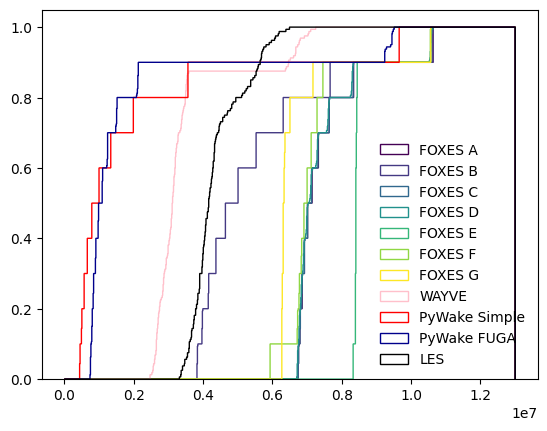

In [90]:
case_num = 4

bins = np.linspace(0, 1.3e7, 1000)

foxes_colors = plt.cm.viridis(np.linspace(0, 1, len(letters)))
pywake_colors = ['red', 'darkblue']

for ll in range(len(letters)):
    plt.hist(foxes_pred[ll].isel(state=case_num).P * 1e3, bins, density=True, cumulative=True, histtype='step', edgecolor=foxes_colors[ll], label='FOXES %s' % letters[ll])
plt.hist(wayve_dat.iloc[case_num].values[1:], bins, cumulative=True, density=True, histtype='step', edgecolor='pink', label='WAYVE')
plt.hist(pywake_no_blockage.isel(time=case_num).Power, bins, density=True, cumulative=True, histtype='step', edgecolor=pywake_colors[0], label='PyWake Simple')
plt.hist(pywake_blockage.isel(time=case_num).Power, bins, density=True, cumulative=True, histtype='step', edgecolor=pywake_colors[1], label='PyWake FUGA')
plt.hist(les_dat.iloc[case_num].values[1:], bins, cumulative=True, density=True, histtype='step', edgecolor='k', label='LES')
plt.legend()
print('ok')

In [96]:
for ll in range(len(letters)):
    print('FOXES %s: ' % letters[ll], np.sqrt(np.mean((foxes_pred[ll].isel(state=case_num).P.values * 1e3 - les_dat.iloc[case_num].values[1:]) ** 2))  / 1e6)
print('PyWake blockage: ', np.sqrt(np.mean((pywake_blockage.isel(time=case_num).Power.values - les_dat.iloc[case_num].values[1:]) ** 2))  / 1e6)
print('PyWake no blockage: ', np.sqrt(np.mean((pywake_no_blockage.isel(time=case_num).Power.values - les_dat.iloc[case_num].values[1:]) ** 2))  / 1e6)


FOXES A:  3.4152066898955082
FOXES B:  2.3995242654699105
FOXES C:  3.398102840686741
FOXES D:  3.3785489986312487
FOXES E:  4.349172814998278
FOXES F:  3.1755830767252675
FOXES G:  2.8404084419353697
PyWake blockage:  3.501998750535213
PyWake no blockage:  3.567654188870859
